**Importing the txt file of the novel, tokenising it and removing the stop words**

In [9]:
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
from collections import defaultdict

# Downloading NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

with open('/content/the_scam.txt', 'r', encoding='utf-8') as file:
    novel_text = file.read()

# Function to perform simple text preprocessing (remove chapter headings, images, tables, etc.)
def preprocess_text(text):
    text = re.sub(r'Chapter \d+', '', text)
    text = re.sub(r'\[Image: .*?\]', '', text)
    text = re.sub(r'\|', '', text)

    return text

# Function to tokenize text and remove stopwords
def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return filtered_tokens

text = preprocess_text(novel_text)
tokens = tokenize_and_remove_stopwords(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


**Analysing the frequency distribution of tokens**

Frequency Distribution of Tokens:
<FreqDist with 11661 samples and 75287 outcomes>
Most Common Words:
[('Rs', 755), ('Harshad', 629), ('crore', 601), ('money', 545), ('market', 456), ('Bank', 445), ('banks', 409), ('RBI', 404), ('bank', 386), ('would', 357)]


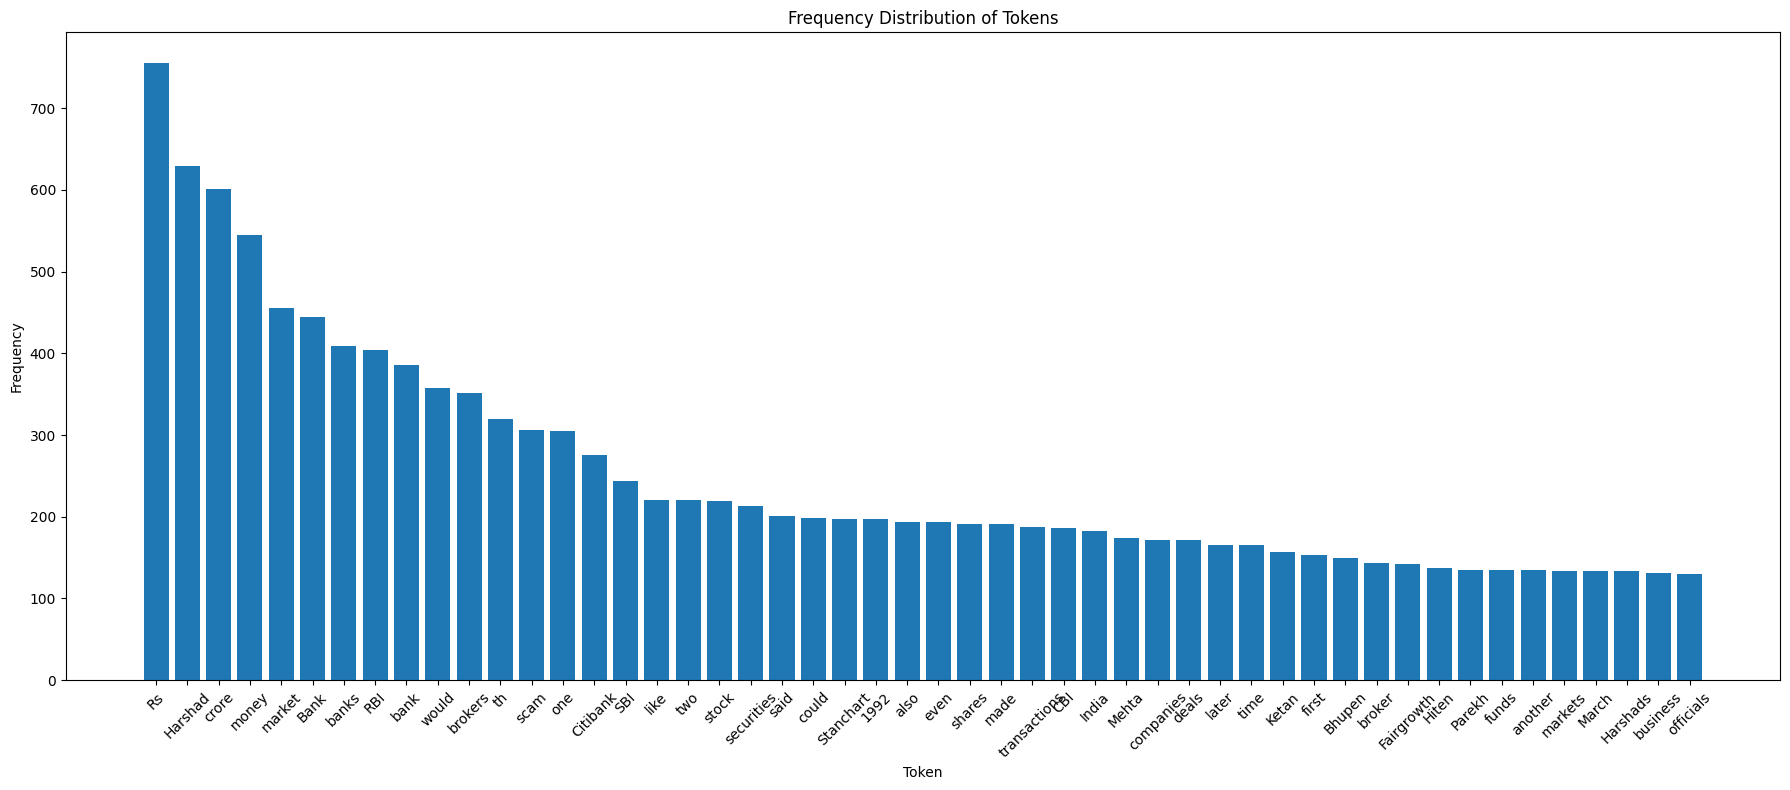

In [3]:
# Frequency distribution
fdist = FreqDist(tokens)

# Analysis part

print("Frequency Distribution of Tokens:")
print(fdist)

print("Most Common Words:")
print(fdist.most_common(10))

# Plotting the frequency distribution of 50 most common tokens

tokens, frequencies = zip(*fdist.most_common(50))

plt.figure(figsize=(18,8))
plt.bar(tokens, frequencies)

plt.xlabel("Token")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Tokens")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Creating the word cloud of token from txt file**

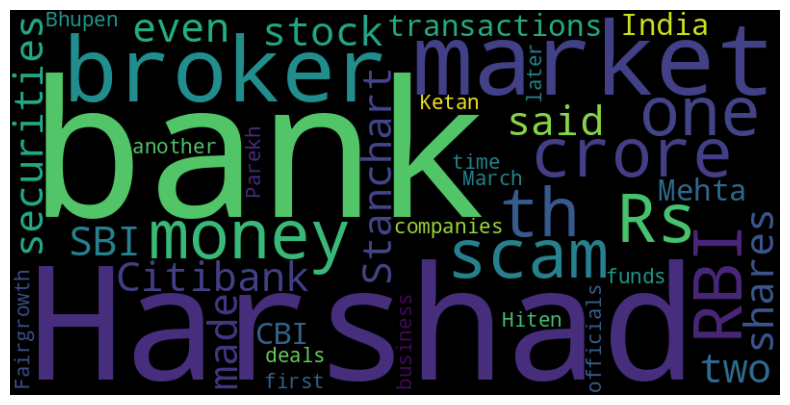

In [4]:
# Function to create a word cloud
def create_word_cloud(tokens):
    if tokens:
        wordcloud = WordCloud(width=800, height=400).generate(' '.join(tokens))
        wordcloud.to_file("wordcloud.png")

         # Displaying the WordCloud in the form of an image
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
    else:
        print("No tokens to create a word cloud from.")

# Creating a word cloud and display the image
create_word_cloud(tokens)

**Doing PoS Tagging using Penn Treebank tagset**

<FreqDist with 11 samples and 50 outcomes>


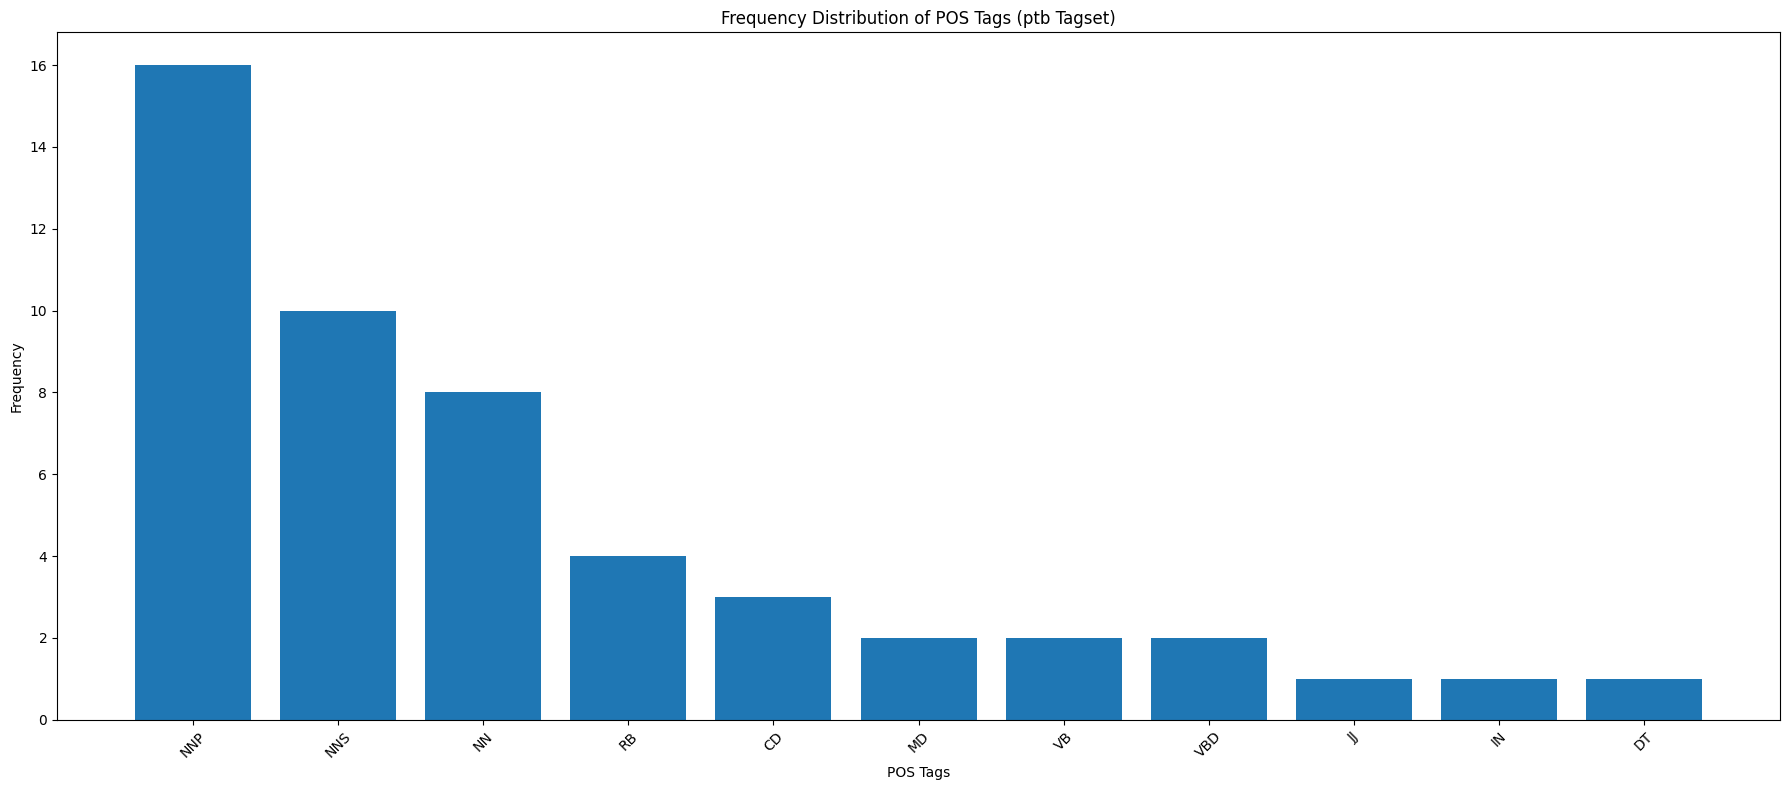

In [5]:
# Function to perform PoS tagging using the Penn Treebank tag set
def pos_tagging(text):
    tagged_text = nltk.pos_tag(text)
    pos_distribution = nltk.FreqDist(tag for (word, tag) in tagged_text)
    return pos_distribution

# Calling PoS tsagging function
pos_distribution = pos_tagging(tokens)
print(pos_distribution)

# extracting the PoS (Parts of Speech) tags and their frequencies from frequency distribution
PoS_Tags, frequencies = zip(*pos_distribution.most_common())


# Creating the bar plot
plt.figure(figsize=(18, 8))
plt.bar(PoS_Tags, frequencies)

plt.xlabel("POS Tags")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of POS Tags (ptb Tagset)")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





**Bi-Gram Probability table**

In [6]:
import pandas as pd
from nltk import bigrams
# Function to split text into chapters
def split_into_chapters(text):
    chapters = re.split(r'Chapter \d+', text)
    # Remove empty chapters
    chapters = [chapter.strip() for chapter in chapters if chapter.strip()]
    return chapters


# Function to create a bi-gram probability table
def create_bigram_probability_table(tokens):
    bigrams = list(nltk.bigrams(tokens))
    bigram_freq = nltk.FreqDist(bigrams)
    bigram_prob = []

    for bigram, freq in bigram_freq.items():
        word1, word2 = bigram
        probability = freq / len(bigrams)
        bigram_prob.append((word1, word2, probability))

    return bigram_prob

# Finding the largest chapter
chapters = re.split(r'Chapter \d+', novel_text)
largest_chapter = max(chapters, key=len)

# Preprocessing the largest chapter
largest_chapter = preprocess_text(largest_chapter)

# Tokenizing the largest chapter without removing stop words
tokens1 = word_tokenize(largest_chapter)

# Creating a bigram probability table for the largest chapter
bigram_probability = create_bigram_probability_table(tokens1)
bigram_probability
pd.DataFrame(data = bigram_probability,columns=['Prev_word','Next_word','Prob']).sort_values(by=['Prob'], ascending=False)

,Prev_word,Next_word,Prob
174,of,the,0.007383
253,in,the,0.004367
60,to,the,0.003639
209,and,the,0.001976
990,Ketan,Parekh,0.001872
...,...,...,...
2869,forces,the,0.000104
2868,only,forces,0.000104
2867,which,only,0.000104
2866,code,which,0.000104


**Playing Shannon Game**

In [8]:
"""**Playing Shannon Game**"""
import random

# Function to calculate accuracy by comparing user input with the original sentence
def calculate_accuracy(original_sentence, user_input):
    original_sentence_lower = original_sentence.lower()
    user_input_lower = user_input.lower()
    accuracy = original_sentence_lower.count(user_input_lower) / len(original_sentence_lower.split())
    return accuracy

# Function to play the Shannon game and evaluate accuracy
def play_shannon_game(bigram_probability, original_sentence):
    # Choosing a random bigram from the bigram probability table.
    bigram = random.choices(bigram_probability, weights=[prob for w1, w2, prob in bigram_probability])[0]
    prev_word, next_word, prob = bigram

    # Replacing the next word with a blank in the original sentence.
    question = original_sentence.replace(next_word, "______")

    # The answer is the next word in the bigram.
    answer = next_word

    # Printing the question to the console.
    print("Fill in the blank:")
    print(question)

    # Getting the user's input.
    user_input = input("Your answer: ")

    # Checking if the user's input is correct.
    if user_input.lower() == answer.lower():
        print("Correct!")
        # Calculating accuracy and displaying it
        accuracy = calculate_accuracy(original_sentence, user_input)
        print(f"Accuracy: {accuracy * 100:.2f}%")
    else:
        print(f"Incorrect. The correct answer is: {answer}")

# Finding chapters other than Chapter C
chapters = split_into_chapters(novel_text)
valid_chapters = [chapter for chapter in chapters if not re.match(r'Chapter C', chapter)]

if valid_chapters:
    # Choosing a random chapter
    random_chapter = random.choice(valid_chapters)
    # Tokenizing the chapter without removing stop words
    chapter_tokens = word_tokenize(random_chapter)

    # Capturing the original sentence before playing the game
    original_sentence = random_chapter

    # Playing the Shannon game and evaluating accuracy
    play_shannon_game(bigram_probability, original_sentence)
else:
    print("No valid chapters found (excluding Chapter C).")

Fill in the blank:
Superbanker
He ran through the
thicket ______ regulations
that separate
opportunity from
pr______its by striking
dubious deals with a
ragbag ______ characters
from politics,
business and
government. In the
process, he created a
generation ______ clones
who swore by his
leadership and
imbibed his style.

IT was the middle ______ June 1992 and Harshad Mehta’s heist and the
Stanchart stream ______ the scam were fully out in the open. Around that time
the RBI governor’s antennae had caught another signal that would become
the third dimension ______ the scam. He was tipped ______f that Fairgrowth Financial
Services, an upstart company started by the late B Ratnakar, former
chairmban ______ Canara Bank, was in trouble. Fairgrowth had borrowed money
from Andhra Bank but was finding it difficult to repay. The governor called
KR Nayak, chairman ______ Andhra Bank.

“What is your exposure to Fairgrowth?”
Nayak feigned ignorance. “We have no exposure to Fairgrowth.”

A few day